
<h1 align="left">HOUGH TRANSFORM</h1> 

- https://docs.opencv.org/3.4/d9/db0/tutorial_hough_lines.html
- https://en.wikipedia.org/wiki/Hough_transform

Representation of a line by $\theta$ and $\rho$

<img src="Hough_Lines_Tutorial_Theory_0.jpg">



Using the double intercept line equiation
$$r = x\,cos\,\theta + y\,sin\,\theta$$ 


This transformation defines a familly of lines that can pass though a single point
$$r_\theta = x_0\,cos\,\theta + y_0\,sin\,\theta$$



A pair $(r_\theta,\theta)$ represents each line that passes by $(x_0,y_0)$.

We consider only points such that r>0 and 0<$\theta$<2$\pi$.

<img src="Hough_Lines_Tutorial_Theory_1.jpg" width="420">


<img src="Hough_Lines_Tutorial_Theory_2.jpg" width="420">

In [32]:
import sys ; sys.path.append("../") # osx
import cvlib

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use(['dark_background'])
PATH = '/Users/carlosalvarado/Desktop/ComputerVision/fotos/'


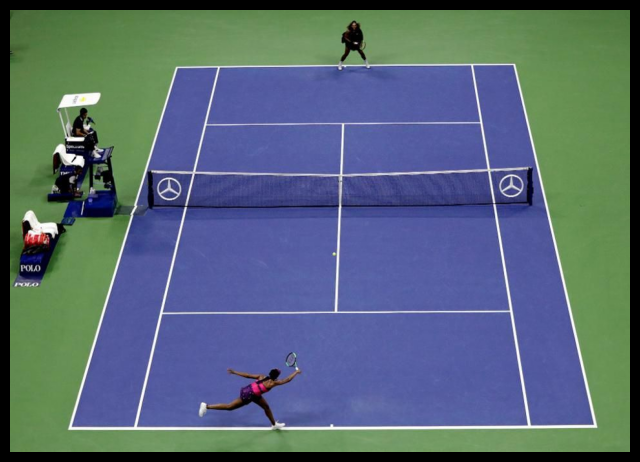

In [33]:
#filename = '../im/skewed.PNG'
filename = PATH + 'tennis2.jpg'
#img = cv.imread(PAHT + 'License_plate_Monaco_2014.jpg',cv.IMREAD_COLOR) 
img = cv.imread(filename,cv.IMREAD_COLOR) 
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
cvlib.imgview(img)

(685, 960)


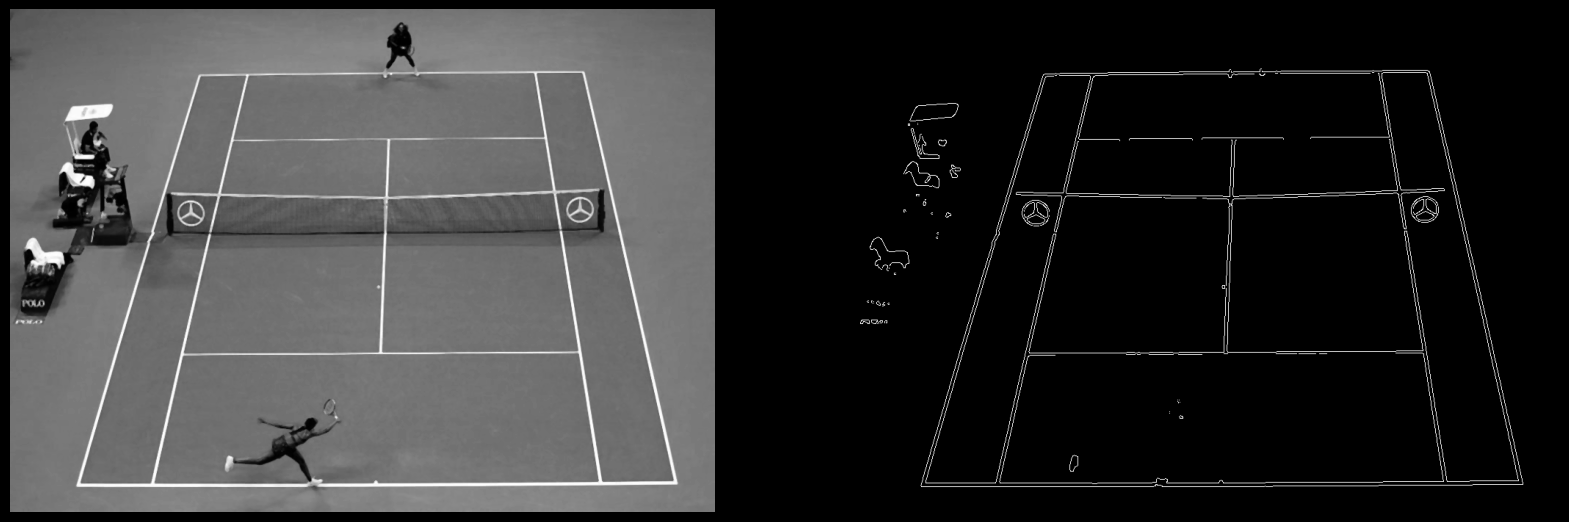

In [49]:
import math

img = cv.imread(filename,cv.IMREAD_COLOR) 
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = cv.medianBlur(gray, 3)

print(img.shape[:2])

edges = cv.threshold(gray,150,255,cv.THRESH_BINARY)[1]
edges = cv.Canny(edges, 100, 200, apertureSize=3)
cvlib.imgcmp(gray,edges)

lines = cv.HoughLines(edges, 1, np.pi/180, 230, None, 0, 0)

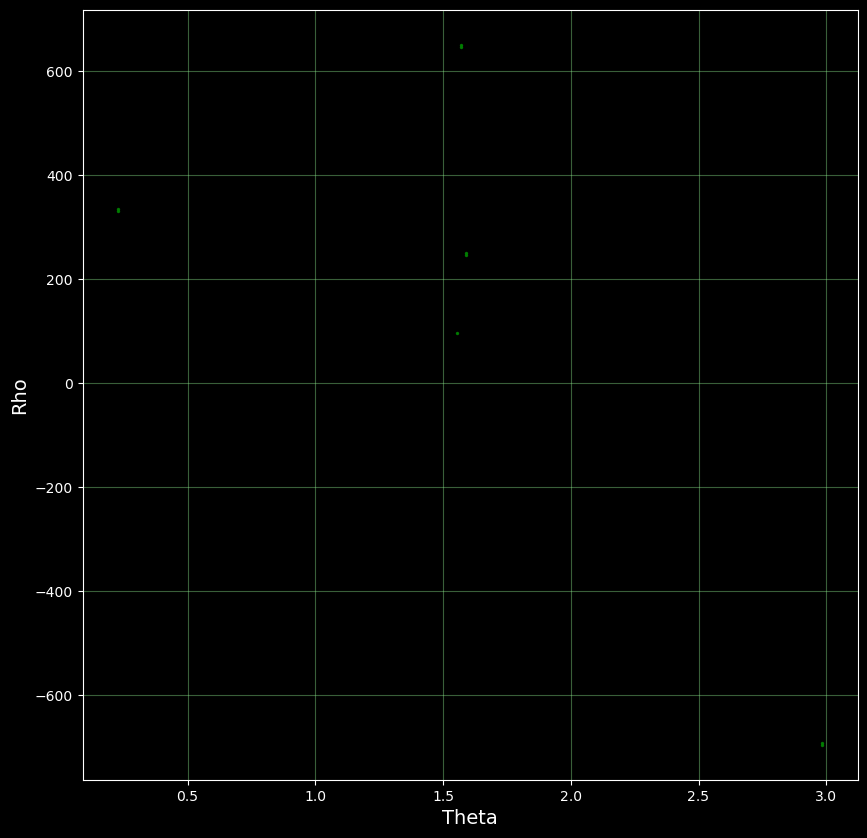

In [50]:
# plot lines in feature space
X=[]
Y=[]
for line in lines:
        x,y=zip(line[0])
        X.append(x)
        Y.append(y)
        
fig,ax =plt.subplots(figsize=(10,10))
ax.scatter(Y,X,s=2,alpha=0.9,color='g')
ax.set_xlabel('Theta',fontsize=14)
ax.set_ylabel('Rho',fontsize=14)
ax.grid(alpha=0.4,color='lightgreen')
plt.show()

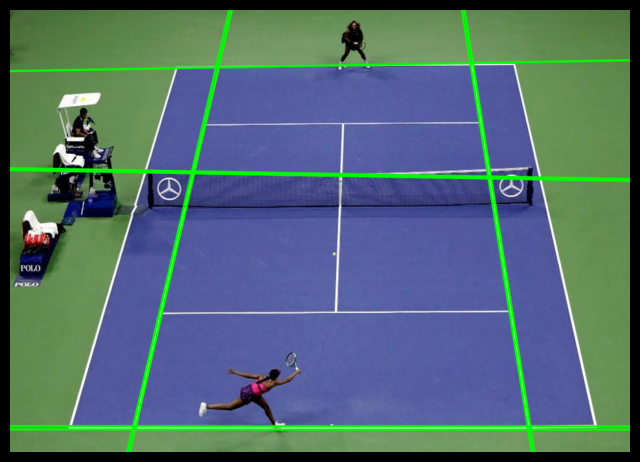

In [51]:
# draw lines in original image
cdst = cv.cvtColor(edges, cv.COLOR_GRAY2BGR)

if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        
        x0 = a * rho
        y0 = b * rho
        k = 1000
        pt1 = (int(x0 + k*(-b)), int(y0 + k*(a)))
        pt2 = (int(x0 - k*(-b)), int(y0 - k*(a)))
        cv.line(img, pt1, pt2, (0,255,0), 2, cv.LINE_AA)

cvlib.imgview(img)

# HOUGH CIRCLES
https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#ga47849c3be0d0406ad3ca45db65a25d2d

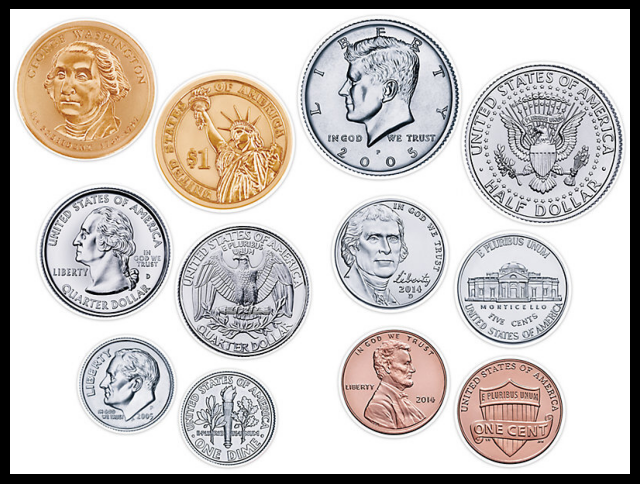

In [27]:
filename = PATH + 'coins.jpeg'
# img = cv.imread(PATH + 'License_plate_Monaco_2014.jpg',cv.IMREAD_COLOR) 
img = cv.imread(filename,cv.IMREAD_COLOR)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
cvlib.imgview(img)

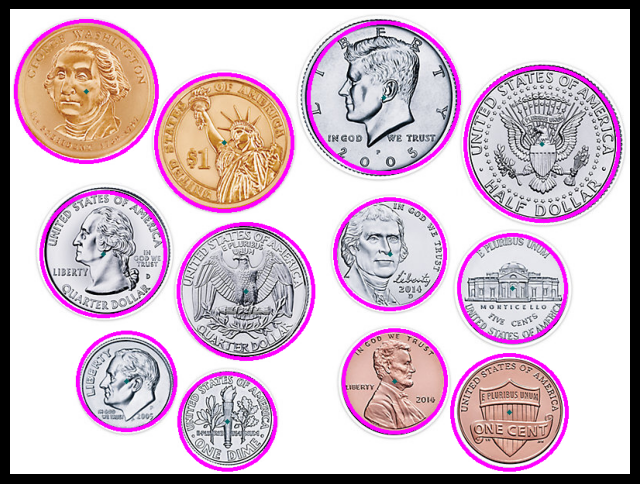

In [28]:
img = cv.imread(filename,cv.IMREAD_COLOR) 
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

gray = cv.medianBlur(gray, 5)

rows = gray.shape[0]
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, 130,
                           param1=50, param2=30,
                           minRadius=30, maxRadius=100)


if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv.circle(img, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv.circle(img, center, radius, (255, 0, 255), 3)

cvlib.imgview(img)

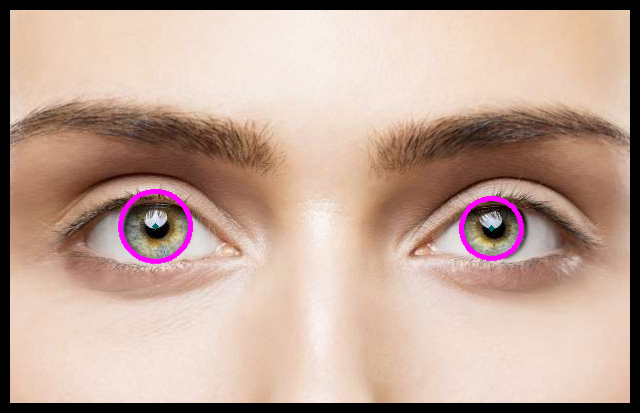

In [30]:
filename = PATH + 'eyes.jpeg'
# img = cv.imread('../im/License_plate_Monaco_2014.jpg',cv.IMREAD_COLOR) 
img = cv.imread(filename,cv.IMREAD_COLOR)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
img = cv.imread(filename,cv.IMREAD_COLOR) 
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

gray = cv.medianBlur(gray, 5)

rows = gray.shape[0]
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, 130,
                           param1=50, param2=30,
                           minRadius=10, maxRadius=40)


if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv.circle(img, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv.circle(img, center, radius, (255, 0, 255), 3)
        
cvlib.imgview(img)